In [10]:
#!/usr/bin/python
# encoding=utf8
from __future__ import division
import os, sys
import threading

class Prepare(threading.Thread):
    
    def __init__(self, X, Y, XT, YT, accLabel=None):
        threading.Thread.__init__(self)
        self.X = X
        self.Y = Y
        self.XT=XT
        self.YT=YT
        self.accLabel= accLabel

    def run(self):
        X = np.zeros(self.X.shape)
        Y = np.zeros(self.Y.shape)
        XT = np.zeros(self.XT.shape)
        YT = np.zeros(self.YT.shape)
        np.copyto(X, self.X)
        np.copyto(Y, self.Y)
        np.copyto(XT, self.XT)
        np.copyto(YT, self.YT)
        for i in range(9):
            X[:, i] = (X[:, i] - X[:, i].mean()) / (X[:, i].std())
        for i in range(9):
            XT[:, i] = (XT[:, i] - XT[:, i].mean()) / (XT[:, i].std())


In [12]:
import LoadData
import DataPreparation
import pickle
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")
LoadData.loaddata('flowdata.binetflow')
file = open('flowdata.pickle', 'rb')
data  = pickle.load(file)
Xdata = data[0]
Ydata =  data[1]
XdataT = data[2]
YdataT = data[3]
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
DataPreparation.Prepare(Xdata,Ydata,XdataT,YdataT)
clf = DecisionTreeClassifier()
clf.fit(Xdata,Ydata)
Prediction = clf.predict(XdataT)
Score = clf.score(XdataT,YdataT)
Precision = precision_score(Prediction,YdataT)
Recall = recall_score(Prediction,YdataT)
Accuracy = accuracy_score(Prediction,YdataT)
F1=f1_score(Prediction,YdataT)
print ("The Accuracy of the Decision Tree Classifier is", Accuracy)
print ("The Score of the Decision Tree Classifier is", Score * 100)
print ("The Precision of the Decision Tree Classifier is", Precision)
print ("The Recall of the Decision Tree Classifier is", Recall)
print ("The F1 Score of the Decision Tree Classifier is", F1)
clf = LogisticRegression(C=10000)
clf.fit(Xdata,Ydata)
Prediction = clf.predict(XdataT)
Score = clf.score(XdataT,YdataT)
Precision = precision_score(Prediction,YdataT)
Recall = recall_score(Prediction,YdataT)
Accuracy = accuracy_score(Prediction,YdataT)
F1=f1_score(Prediction,YdataT)
print ("The Accuracy of the Logistic Regression Classifier is", Accuracy)
print ("The Score of the Logistic Regression Classifier is", Score * 100)
print ("The Precision of the Logistic Regression Classifier is", Precision)
print ("The Recall of the Logistic Regression Classifier is", Recall)
print ("The F1 Score of the Logistic Regression Classifier is", F1)
clf = GaussianNB()
clf.fit(Xdata,Ydata)
Prediction = clf.predict(XdataT)
Score = clf.score(XdataT,YdataT)
Precision = precision_score(Prediction,YdataT)
Recall = recall_score(Prediction,YdataT)
Accuracy = accuracy_score(Prediction,YdataT)
F1=f1_score(Prediction,YdataT)
print ("The Accuracy of the Gaussian Naive Bayes Classifier is", Accuracy)
print("The Score of the Gaussian Naive Bayes classifier is", Score * 100)
print ("The Precision of the Naive Bayes Classifier is", Precision)
print ("The Recall of the Naive Bayes Classifier is", Recall)
print ("The F1 Score of the Naive Bayes Classifier is", F1)
clf = KNeighborsClassifier()
clf.fit(Xdata,Ydata)
Prediction = clf.predict(XdataT)
Score = clf.score(XdataT,YdataT)
Precision = precision_score(Prediction,YdataT)
Recall = recall_score(Prediction,YdataT)
Accuracy = accuracy_score(Prediction,YdataT)
F1=f1_score(Prediction,YdataT)
print ("The Accuracy of the K-Nearest Neighbours Classifier is", Accuracy)
print("The Score of the K-Nearest Neighbours classifier is", Score * 100)
print ("The Precision of the K-Nearest Neighbours Classifier is", Precision)
print ("The Recall of the K-Nearest Neighbours Classifier is", Recall)
print ("The F1 Score of the K-Nearest Neighbours Classifier is", F1)
from keras.models import *
from keras.layers import Dense, Activation
from keras.optimizers import *
model = Sequential()
model.add(Dense(10, input_dim=9, activation="sigmoid"))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))
sgd = SGD(lr=0.01, decay=0.000001, momentum=0.9, nesterov=True) 
model.compile(optimizer=sgd, loss='mse')
model.fit(Xdata, Ydata, nb_epoch=200, batch_size=100)
Score = model.evaluate(XdataT, YdataT, verbose=0)
Precision = precision_score(Prediction,YdataT)
Recall = recall_score(Prediction,YdataT)
Accuracy = accuracy_score(Prediction,YdataT)
F1=f1_score(Prediction,YdataT)
print ("The Accuracy of the Neural Network Classifier is", Accuracy)
print("The Score of the Neural Network is", Score * 100 )
print ("The Precision of the Neural Network Classifier is", Precision)
print ("The Recall of the Neural Network Classifier is", Recall)
print ("The F1 Score of the Neural Network Classifier is", F1)


The Accuracy of the Decision Tree Classifier is 0.994
The Score of the Decision Tree Classifier is 99.4
The Precision of the Decision Tree Classifier is 0.988
The Recall of the Decision Tree Classifier is 1.0
The F1 Score of the Decision Tree Classifier is 0.993963782696177
The Accuracy of the Logistic Regression Classifier is 0.9211
The Score of the Logistic Regression Classifier is 92.11
The Precision of the Logistic Regression Classifier is 0.9546
The Recall of the Logistic Regression Classifier is 0.8946579194001875
The F1 Score of the Logistic Regression Classifier is 0.9236574746008709
The Accuracy of the Gaussian Naive Bayes Classifier is 0.7266
The Score of the Gaussian Naive Bayes classifier is 72.66
The Precision of the Naive Bayes Classifier is 0.995
The Recall of the Naive Bayes Classifier is 0.6474492451847996
The F1 Score of the Naive Bayes Classifier is 0.7844528539892778
The Accuracy of the K-Nearest Neighbours Classifier is 0.9661
The Score of the K-Nearest Neighbours 

Epoch 76/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2483
Epoch 77/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2486
Epoch 78/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2487
Epoch 79/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2483A: 0s - loss: 0.248
Epoch 80/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2484
Epoch 81/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2484A: 0s - loss: 0.24
Epoch 82/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2485
Epoch 83/200
20000/20000 [==============================] - 0s 8us/step - loss: 0.2487
Epoch 84/200
20000/20000 [==============================] - 0s 8us/step - loss: 0.2487
Epoch 85/200
20000/20000 [==============================] - 0s 8us/step - loss: 0.2485
Epoch 86/200
20000/20000 [==============================] - 0s 8us/step - loss: 0.2485
Epoch 

20000/20000 [==============================] - 0s 7us/step - loss: 0.2485
Epoch 165/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2482
Epoch 166/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2483
Epoch 167/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2483A: 0s - loss: 0.24
Epoch 168/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2483A: 0s - loss: 0.248 - ETA: 0s - loss: 0.248
Epoch 169/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2485A: 0s - loss: 0.248
Epoch 170/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2483
Epoch 171/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2482
Epoch 172/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2482
Epoch 173/200
20000/20000 [==============================] - 0s 7us/step - loss: 0.2483
Epoch 174/200
20000/20000 [===========================

In [3]:
Prediction

array([0, 0, 0, ..., 0, 1, 1])

In [4]:
YdataT

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [6]:
# Load data
digits = load_digits()

# Create feature matrix and target vector
X, y = digits.data, digits.target

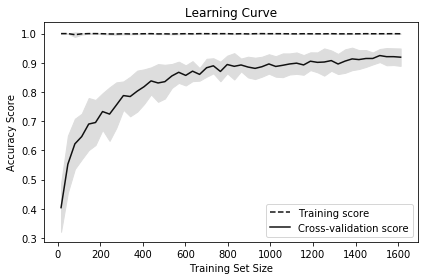

In [7]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
y

array([0, 1, 2, ..., 8, 9, 8])